# Waveform
It is a popular simulated example, taken from Breiman et al. (1984, pages 49–55), and used in Hastie and Tibshirani (1996b) and elsewhere. It is a three-class problem with 21 variables, and is considered to be a difficult pattern recognition problem. The
predictors are defined by

\begin{array}{rlrl}{X_{j}} & {=U h_{1}(j)+(1-U) h_{2}(j)+\epsilon_{j}} & {\text { Class } 1} \\ {X_{j}} & {=U h_{1}(j)+(1-U) h_{3}(j)+\epsilon_{j}} & {\text { Class } 2} \\ {X_{j}} & {=U h_{2}(j)+(1-U) h_{3}(j)+\epsilon_{j}} & {\text { Class } 3}\end{array}

where j = 1, 2,... , 21, U is uniform on (0, 1), $\epsilon_{j}$ are standard normal variates, and the $h_ℓ$ are the shifted triangular waveforms: $h_{1}(j)=\max (6-|j-11|, 0), h_{2}(j)=h_{1}(j-4) \text { and } h_{3}(j)=h_{1}(j+4)$.

The dataset provides an instance of 300 training observations and 500 test observations.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

np.warnings.filterwarnings('ignore')
%matplotlib inline

# define plots common properties and color constants
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY1, GRAY4, GRAY7 = '#231F20', '#646369', '#929497'

## Load and Prepare Data

In [2]:
data = pd.read_csv("../data/waveform.txt", sep='\t')
data.head()

,is_test,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,...,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21
0,0,1,2,-1.4854,0.3470,1.6592,1.2570,1.3945,4.3182,3.9421,...,4.2555,1.5460,1.0990,0.0588,2.0671,-0.9759,-1.0614,-0.8499,1.0453,-0.6089
1,0,2,1,-0.9938,1.2748,-1.1977,-0.3464,-0.3442,1.2738,0.1725,...,2.8144,4.8261,5.9428,4.4309,5.2562,3.6981,2.7722,3.4906,0.7623,-0.5920
2,0,3,1,-0.2120,-0.5239,-0.6108,2.5555,-0.1607,0.2911,0.7401,...,4.3555,3.5097,4.2721,6.7883,3.0623,3.3953,1.5929,3.0073,2.7663,-0.7788
3,0,4,1,-0.4256,-0.8360,0.4756,-0.7948,-1.8930,-0.0541,-1.8688,...,3.7252,2.3957,4.0405,5.1305,5.2005,2.9713,2.6089,1.0063,1.3321,-0.1967
4,0,5,2,1.0515,-0.5382,-1.3438,0.9739,0.3659,1.8218,4.8663,...,4.6134,2.5792,2.9855,2.8388,0.1155,-1.3772,-1.5039,2.0517,0.2095,-1.7289


In [3]:
target = 'y'
features = [f'x.{i}' for i in range(1, 22)]
X = data[features].values
y = data[target].values
# rename y, so the first class has name 0 instead of 1
y = y - 1
# split data by is_test flag
is_test = data.is_test.values
X_train, X_test = X[is_test == 0], X[is_test == 1]
y_train, y_test = y[is_test == 0], y[is_test == 1]

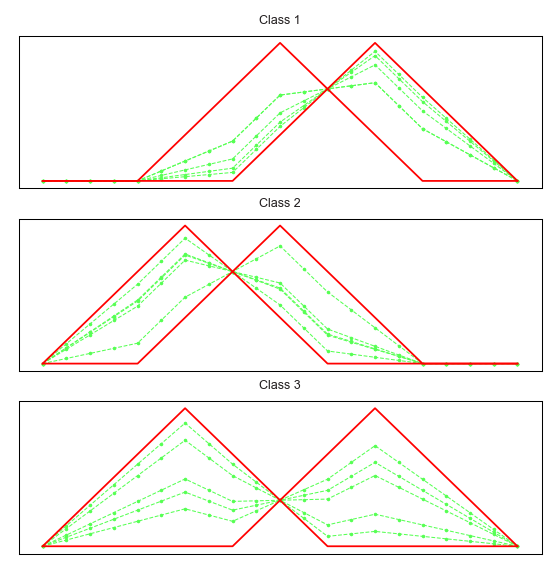

In [4]:
# PAGE 453. FIGURE 12.14. Some examples of the waveforms generated from model
#           (12.64) before the Gaussian noise is added.
def h1(j): return max(6 - abs(j - 11), 0)
def h2(j): return h1(j - 4)
def h3(j): return h1(j + 4)


def gen_sample(first_fnc, second_fnc, U):
    return [U*first_fnc(j) + (1-U)*second_fnc(j) for j in range(1, 22)]


def gen_rnd_sample(first_fnc, second_fnc):
    return gen_sample(first_fnc, second_fnc, np.random.uniform())

class_fncs = ((h1, h2), (h1, h3), (h2, h3))

fig, axarr = plt.subplots(3, 1, figsize=(4.5, 4.57), dpi=150)
plt.subplots_adjust(wspace=0.1)

x_plt = list(range(1, 22))
for cls in range(3):
    fncs = class_fncs[cls]
    ax = axarr[cls]
    plt.axes(ax)
    ax.tick_params(
        bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.title(f'Class {cls+1}', fontsize=6, color=GRAY1)
    for i in range(5):
        sample = gen_rnd_sample(*fncs)
        ax.plot(x_plt, sample, color='#57FF54', linewidth=0.5, linestyle='--')
        ax.scatter(x_plt, sample, color='#57FF54', s=0.5)
    ax.plot(x_plt, gen_sample(*fncs, 0), color='red', linewidth=0.85)
    ax.plot(x_plt, gen_sample(*fncs, 1), color='red', linewidth=0.85)

## LDA & QDA

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [6]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

lda_train_er = 1 - accuracy_score(y_train, lda.predict(X_train))
qda_train_er = 1 - accuracy_score(y_train, qda.predict(X_train))
lda_test_er = 1 - accuracy_score(y_test, lda.predict(X_test))
qda_test_er = 1 - accuracy_score(y_test, qda.predict(X_test))
print(f'LDA Error Rate: Training {lda_train_er:.2f}, Test {lda_test_er:.2f}')
print(f'QDA Error Rate: Training {qda_train_er:.2f}, Test {qda_test_er:.2f}')

LDA Error Rate: Training 0.15, Test 0.21
QDA Error Rate: Training 0.05, Test 0.22


## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtc = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

dtc_train_er = 1 - accuracy_score(y_train, dtc.predict(X_train))
dtc_test_er = 1 - accuracy_score(y_test, dtc.predict(X_test))
print(f'CART: Training {dtc_train_er:.2f}, Test {dtc_test_er:.2f}')

CART: Training 0.07, Test 0.29


## FDA/MARS
I have not found the flexible discriminant analysis implementation for Python. Implemented it myself. The result is close to the values from the book, but slightly worse. Maybe I made some mistakes. More research and testing is needed. The approch is explained here https://www.researchgate.net/publication/2889611_Flexible_Discriminant_Analysis_by_Optimal_Scoring.

In [9]:
from sklearn.preprocessing import OneHotEncoder
from pyearth import Earth

In [10]:
# let's implement our flexible discriminant classifier
class FlexibleDiscriminantAnalysis():
    def __init__(self, model, n_components=None):
        self.model = model
        self.n_components = n_components

    def fit(self, X, y):
        _, counts_elements = np.unique(y, return_counts=True)
        priors = counts_elements/y.shape[0]
        # PAGE 440. We create an N × K indicator response matrix Y
        Y = OneHotEncoder(
            categories='auto'
        ).fit_transform(np.atleast_2d(y).T).toarray()

        # PAGE 441. Multivariate nonparametric regression. Fit a multiresponse,
        #           adaptive nonparametric regression of Y on X
        self.model.fit(X, Y)

        # PAGE 441. Optimal scores. Compute the eigen-decomposition of
        #           Y.T @ Y_hat
        X_exp = self.model.transform(X)
        self.B = self.model.coef_.T
        evals, evecs = np.linalg.eig(Y.T @ (X_exp @ self.B))
        evals_ord = np.argsort(evals)[::-1]
        evals = evals[evals_ord]
        evecs = evecs[:, evals_ord]
        O = evecs
        O /= np.sqrt(np.diagonal(O.T @ np.diag(priors) @ O))

        # PAGE 441. Update the model from step 1 using the optimal scores.
        self.B = self.B @ O
        R = self.transform(X)
        self.lda = LinearDiscriminantAnalysis().fit(R, y)
        return self

    def transform(self, X):
        X_exp = self.model.transform(X)
        R = (self.B.T @ X_exp.T).T
        if self.n_components is None:
            return R
        return R[:, :self.n_components]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def predict(self, X):
        R = self.transform(X)
        return self.lda.predict(R)

In [11]:
fda1 = FlexibleDiscriminantAnalysis(
    Earth(max_terms=21, max_degree=1, enable_pruning=False)
).fit(X_train, y_train)
fda1_train_er = 1 - accuracy_score(y_train, fda1.predict(X_train))
fda1_test_er = 1 - accuracy_score(y_test, fda1.predict(X_test))
print(f'FDA/MARS (degree = 1): Training {fda1_train_er:.2f}, Test {fda1_test_er:.2f}')

fda2 = FlexibleDiscriminantAnalysis(
    Earth(max_terms=36, max_degree=2, enable_pruning=False)
).fit(X_train, y_train)
fda2_train_er = 1 - accuracy_score(y_train, fda2.predict(X_train))
fda2_test_er = 1 - accuracy_score(y_test, fda2.predict(X_test))
print(f'FDA/MARS (degree = 2): Training {fda2_train_er:.2f}, Test {fda2_test_er:.2f}')

FDA/MARS (degree = 1): Training 0.13, Test 0.20
FDA/MARS (degree = 2): Training 0.06, Test 0.19


## MDA

In [12]:
from sklearn.utils.multiclass import unique_labels
from scipy.stats import multivariate_normal

In [13]:
# PAGE 449. Linear discriminant analysis can be viewed as a prototype
#           classifier. Each class is represented by its centroid, and we
#           classify to the closest using an appropriate metric. In many
#           situations a single prototype is not sufficient to represent
#           inhomogeneous classes, and mixture models are more appropriate.
class MixtureDiscriminantAnalysis():
    def __init__(self, n_prototypes, max_steps=100, random_state=0):
        self.n_prototypes = n_prototypes
        self.random_state = random_state
        self.max_steps = max_steps

    def fit(self, X, y):
        N, p = X.shape[0], X.shape[1]
        self.classes_ = unique_labels(y)
        _, y_t = np.unique(y, return_inverse=True)
        self.priors_ = np.bincount(y_t) / float(len(y))
        # set initial random means for each prototype
        np.random.seed(self.random_state)
        means = np.stack(
            [np.vstack([np.quantile(X[y == k][:, i],
                                    np.random.uniform(0, 1, self.n_prototypes))
                        for i in range(p)]).T
             for k in self.classes_])
        # assign each observation to the closest class prototype
        # and calculate mixin proportions
        y_r = np.zeros(shape=N, dtype=int)
        for i in range(N):
            y_r[i] = np.argmin(np.sum((means[y[i]] - X[i])**2, axis=1))
        mixin_proportions = np.stack(
            [np.bincount(y_r[y == k]) / np.sum(y == k)
             for k in self.classes_])
        # calculate init covariance matrix based on hard prototype assignment
        cov = np.zeros(shape=(p, p))
        for k in self.classes_:
            for r in range(self.n_prototypes):
                Xkr = X[(y == k) & (y_r == r), :]
                cov += mixin_proportions[k, r] * \
                       self.priors_[k] * np.cov(Xkr.T, bias=1)

        # do Expectation-Maximization
        for step in range(self.max_steps):
            # PAGE 450. E-step: Given the current parameters, compute the
            #           responsibility of subclass ckr within class k for each
            #           of the class-k observations (gi = k): (12.62)
            resp = np.zeros((N, self.n_prototypes))
            for i in range(N):
                k = y[i]
                for r in range(self.n_prototypes):
                    prob = multivariate_normal.pdf(X[i], means[k, r], cov)
                    resp[i, r] = mixin_proportions[k, r] * prob
                resp[i, :] /= np.sum(resp[i])
            # PAGE 450. M-step: Compute the weighted MLEs for the parameters of
            #           each of the component Gaussians within each of the
            #           classes, using the weights from the E-step.
            for k in self.classes_:
                Xk = X[y == k]
                respk = resp[y == k]
                for r in range(self.n_prototypes):
                    respkr = respk[:, r]
                    mixin_proportions[k, r] = np.sum(respkr)/Xk.shape[0]
                    tmp = np.vstack([respkr]*Xk.shape[1]).T
                    means[k, r] = np.sum(Xk*tmp, axis=0)/np.sum(respkr)

            cov = np.zeros(shape=(p, p))
            for i in range(N):
                k = y[i]
                for r in range(self.n_prototypes):
                    v = np.atleast_2d(X[i] - means[k, r]).T
                    cov += resp[i, r]*(v @ v.T)
            cov /= N

        self.means_ = means
        self.mixin_proportions_ = mixin_proportions
        self.cov_ = cov

        return self

    def predict_proba(self, X):
        # PAGE 449. Given such a model for each class, the class
        #           posterior probabilities are given by (12.60)
        prot_probs = np.zeros(
            (X.shape[0], len(self.classes_), self.n_prototypes))
        for k in self.classes_:
            pk = self.priors_[k]
            for r in range(self.n_prototypes):
                mpkr = self.mixin_proportions_[k, r]
                prob = mpkr * multivariate_normal.pdf(
                    X, self.means_[k, r], self.cov_) * pk
                prot_probs[:, k, r] = prob

        k_probs = np.sum(prot_probs, axis=2)
        den = np.sum(k_probs, axis=1)
        result = k_probs/np.vstack([den]*len(self.classes_)).T
        return result

    def predict(self, X):
        result = np.argmax(self.predict_proba(X), axis=1)
        return result

In [14]:
mda = MixtureDiscriminantAnalysis(3, 50, 27).fit(X_train, y_train)
mda_train_er = 1 - accuracy_score(y_train, mda.predict(X_train))
mda_test_er = 1 - accuracy_score(y_test, mda.predict(X_test))
print(f'MDA (3 subclasses): Training {mda_train_er:.3f}, Test {mda_test_er:.3f}')

MDA (3 subclasses): Training 0.110, Test 0.172
